In [3]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.preprocessing as pp
import numpy as np
import matplotlib.pyplot as plt

### Note: Data too large to push to github

In [4]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

cmap_dict = {}
i = 0
for cmap_category, cmap_list in cmaps:
    for cmap in cmap_list:
        cmap_dict[i] = cmap
        i += 1
#     print(cmap_category)
#     print(cmap_list)

# for cmap in cmap_list:
#     print(plt.get_cmap(cmap))

# cmap_dict = {i: plt.get_cmap(cmap_list[i]) for i in range(len(cmap_list))}
# print(cmap_dict)
print(len(cmap_dict))
print(cmap_dict.values())


colormap = {0: 'orange', 1:'red', 2:'green', 3:'blue', 4:'yellow'}
print(cmap_dict)
print(colormap)

from matplotlib import colors

cmap = colors.ListedColormap(['k','b','y','g','r'])
print(cmap)

83
dict_values(['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic', 'twilight', 'twilight_shifted', 'hsv', 'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral', 'gist_ncar'])
{0: 'viridis', 1: 'plasma', 2: 'inferno', 3: 'magma', 4: 'cividis', 5: 'Greys', 6: 'Purples', 7: 'Blues', 8: 'Greens', 9: 'Oranges', 10: 'Reds', 11: 'YlOrBr',

## Introduction:

## EDA:

In [5]:
DATA_FOLDER = '../data/'
FIGURE_FOLDER = '../figures/'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'


data_df = pd.read_csv(DATA_FOLDER + TRAIN_FILE)
test_df = pd.read_csv(DATA_FOLDER + TEST_FILE)

#### Overall Data Qualities:

In [6]:
POINTS_PER_BREATH = 80
breaths_to_plot = 30
points_to_plot = POINTS_PER_BREATH * breaths_to_plot

In [7]:
print(data_df.shape)
print(test_df.shape)
shape = data_df.shape
display(data_df.head())
display(test_df.head())
display(data_df['pressure'].describe())
for k, v in dict(data_df.dtypes).items():
    print(f'{k}: {v}')

(6036000, 8)
(4024000, 7)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


count    6.036000e+06
mean     1.122041e+01
std      8.109703e+00
min     -1.895744e+00
25%      6.329607e+00
50%      7.032628e+00
75%      1.364103e+01
max      6.482099e+01
Name: pressure, dtype: float64

id: int64
breath_id: int64
R: int64
C: int64
time_step: float64
u_in: float64
u_out: int64
pressure: float64


### Missing Data:

In [8]:
data_df.isnull().sum(axis=0)

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

### Features:

In [17]:
for k, v in dict(data_df.dtypes).items():
    print(f'{k}:')
    display(data_df[k].describe())

id:


count    6.036000e+06
mean     3.018000e+06
std      1.742443e+06
min      1.000000e+00
25%      1.509001e+06
50%      3.018000e+06
75%      4.527000e+06
max      6.036000e+06
Name: id, dtype: float64

breath_id:


count    6.036000e+06
mean     6.283886e+04
std      3.633526e+04
min      1.000000e+00
25%      3.137700e+04
50%      6.276550e+04
75%      9.430100e+04
max      1.257490e+05
Name: breath_id, dtype: float64

R:


count    6.036000e+06
mean     2.703618e+01
std      1.959549e+01
min      5.000000e+00
25%      5.000000e+00
50%      2.000000e+01
75%      5.000000e+01
max      5.000000e+01
Name: R, dtype: float64

C:


count    6.036000e+06
mean     2.608072e+01
std      1.715231e+01
min      1.000000e+01
25%      1.000000e+01
50%      2.000000e+01
75%      5.000000e+01
max      5.000000e+01
Name: C, dtype: float64

time_step:


count    6.036000e+06
mean     1.307225e+00
std      7.659778e-01
min      0.000000e+00
25%      6.428995e-01
50%      1.308123e+00
75%      1.965502e+00
max      2.937238e+00
Name: time_step, dtype: float64

u_in:


count    6.036000e+06
mean     7.321615e+00
std      1.343470e+01
min      0.000000e+00
25%      3.936623e-01
50%      4.386146e+00
75%      4.983895e+00
max      1.000000e+02
Name: u_in, dtype: float64

u_out:


count    6.036000e+06
mean     6.204493e-01
std      4.852752e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: u_out, dtype: float64

pressure:


count    6.036000e+06
mean     1.122041e+01
std      8.109703e+00
min     -1.895744e+00
25%      6.329607e+00
50%      7.032628e+00
75%      1.364103e+01
max      6.482099e+01
Name: pressure, dtype: float64

In [18]:
a = df.iloc[df['breath_id'] in [1, 2, 3] ['breath_id']]
display(a)

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\stone\AppData\Local\Temp/ipykernel_23504/572076349.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  a = df.iloc[df['breath_id'] in [1, 2, 3] ['breath_id']]


NameError: name 'df' is not defined

#### Discounting:
The ID and Breath_ID can be immediately discounted: these features are not helpful for training.

#### R: Categorical

In [10]:
R_vc = data_df['R'].value_counts()
num_cats = len(R_vc.keys())
print(R_vc)
print("Number of categories: " + str(num_cats))

50    2410080
5     1988800
20    1637120
Name: R, dtype: int64
Number of categories: 3


In [11]:
R_barplot_data = {"R":R_vc.keys(),
        "counts":[R_vc[k] for k in R_vc.keys()]
        };
R_barplot_df = pd.DataFrame(data = R_barplot_data)

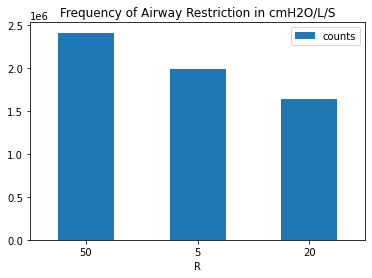

In [12]:
ax = R_barplot_df.plot.bar(x="R", y="counts", rot=0, title="Frequency of Airway Restriction in cmH2O/L/S");


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'R counts.png')

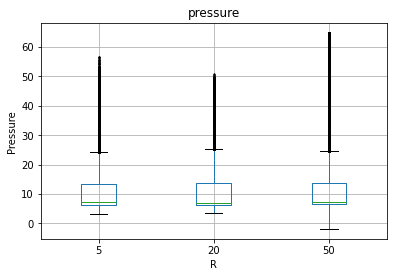

In [13]:
flierprops = dict(markersize=1)
ax = data_df[['R', 'pressure']].boxplot(by = 'R', flierprops=flierprops)
plt.xlabel("R")
plt.ylabel("Pressure")
plt.suptitle("")
plt.show()

fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'R vs Pressure boxplot.png')

#### C: categorical

In [14]:
C_vc = data_df['C'].value_counts()
num_cats = len(C_vc.keys())
print(C_vc)
print("Number of categories: " + str(num_cats))

print(C_vc[10])

10    2244720
50    1971680
20    1819600
Name: C, dtype: int64
Number of categories: 3
2244720


In [15]:
C_barplot_data = {"C":C_vc.keys(),
        "counts":[C_vc[k] for k in C_vc.keys()]
        };
C_barplot_df = pd.DataFrame(data = C_barplot_data)

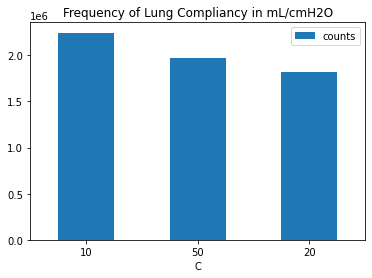

In [16]:
ax = C_barplot_df.plot.bar(x="C", y="counts", rot=0, title="Frequency of Lung Compliancy in mL/cmH2O");


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'C bar blot.png')

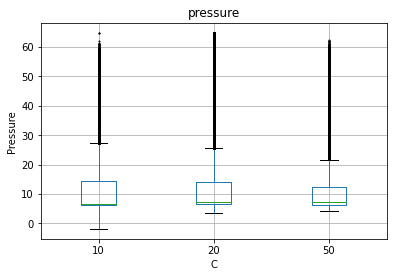

In [17]:
flierprops = dict(markersize=1)
ax = data_df[['C', 'pressure']].boxplot(by = 'C', flierprops=flierprops)
plt.xlabel("C")
plt.ylabel("Pressure")
plt.suptitle("")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'C vs pressure boxplot.png')

#### time_step: continuous

In [18]:
display(data_df['time_step'].value_counts())

0.000000    75450
0.031934       46
0.031935       44
0.031920       43
0.031938       43
            ...  
1.793088        1
1.827272        1
1.896594        1
1.930891        1
2.638017        1
Name: time_step, Length: 3767571, dtype: int64

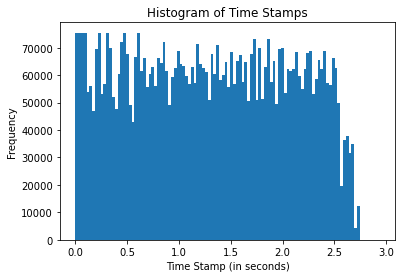

In [21]:
num_rows=  shape[0]
nbins = int(num_rows**0.3)
ax = data_df['time_step'].plot.hist(bins = nbins)
plt.xlabel("Time Stamp (in seconds)")
plt.ylabel("Frequency")
plt.title("Histogram of Time Stamps")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'time_step distribution.png')

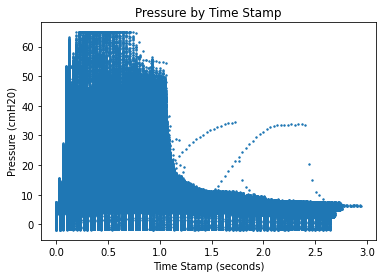

In [22]:
ax = data_df.plot.scatter('time_step', 'pressure', s = 2)
plt.xlabel("Time Stamp (seconds)")
plt.ylabel("Pressure (cmH20)")
plt.title("Pressure by Time Stamp")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'Pressure over time step scatterplot.png')

#### Outliers:

In [23]:
time_stamp_val = 1.5
pressure_val = 11.5

outliers = data_df.loc[(data_df['time_step'] > time_stamp_val) & (data_df['pressure'] > pressure_val), ['breath_id']]
outlier_ids = outliers['breath_id'].unique()
print(outlier_ids)
outlying_data = data_df.loc[data_df['breath_id'].isin(outlier_ids)]
display(outlying_data.head())

true_outliers = data_df.loc[(data_df['time_step'] > time_stamp_val) & (data_df['pressure'] > pressure_val + 1.5), ['breath_id']]
true_out_ids = true_outliers['breath_id'].unique()
true_outlying_data = data_df.loc[data_df['breath_id'].isin(true_out_ids)]
print(true_out_ids)

outlying_cmap = {outlier_ids[i]: colormap[i] for i in range(len(outlier_ids))}

[  1563  46023  66164 120235]


,id,breath_id,R,C,time_step,u_in,u_out,pressure
77920,77921,1563,5,50,0.000000,16.968134,0,5.275075
77921,77922,1563,5,50,0.033651,100.000000,0,6.399909
77922,77923,1563,5,50,0.067351,100.000000,0,11.742872
77923,77924,1563,5,50,0.101397,100.000000,0,15.117375
77924,77925,1563,5,50,0.135396,100.000000,0,16.945231


[ 46023 120235]


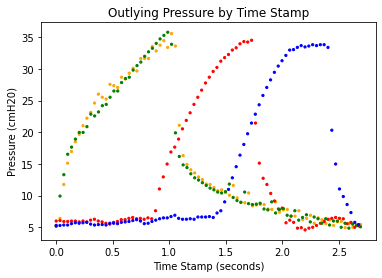

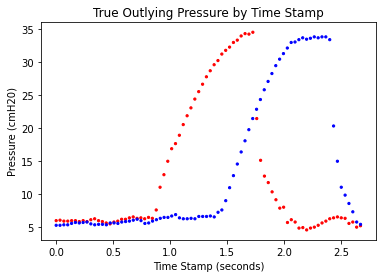

In [25]:
outlying_data.plot.scatter('time_step', 'pressure', s = 5, c=outlying_data['breath_id'].map(outlying_cmap))

plt.xlabel("Time Stamp (seconds)")
plt.ylabel("Pressure (cmH20)")
plt.title("Outlying Pressure by Time Stamp")
plt.show()

ax = true_outlying_data.plot.scatter('time_step', 'pressure', s = 5, c=true_outlying_data['breath_id'].map(outlying_cmap))
plt.xlabel("Time Stamp (seconds)")
plt.ylabel("Pressure (cmH20)")
plt.title("True Outlying Pressure by Time Stamp")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'True Outlying Pressure over Time Scatter.png')

##### Compare to 'normal' Individual Plots:

In [26]:
points_by_breath = np.array_split(np.asarray(list(range(points_to_plot))), breaths_to_plot)
# print(points_by_breath)
display(data_df['breath_id'][:points_to_plot])

0        1
1        1
2        1
3        1
4        1
        ..
2395    35
2396    35
2397    35
2398    35
2399    35
Name: breath_id, Length: 2400, dtype: int64

C:\Users\stone\Miniconda3\envs\BrownDSI\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


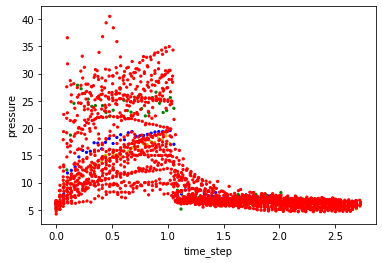

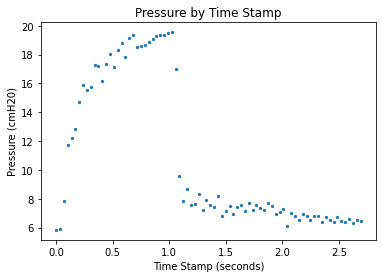

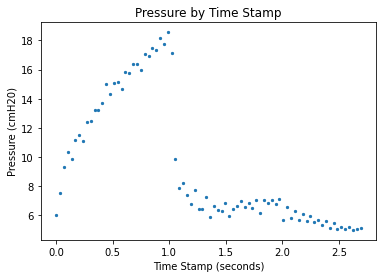

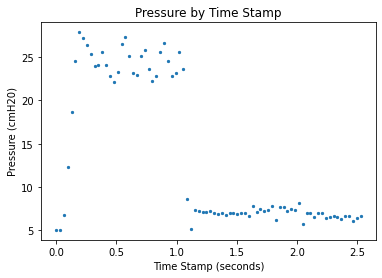

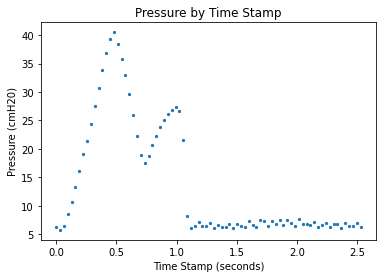

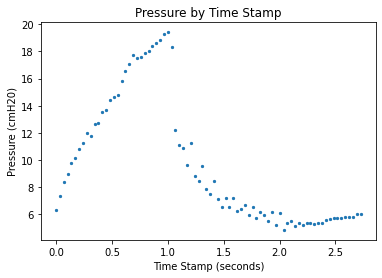

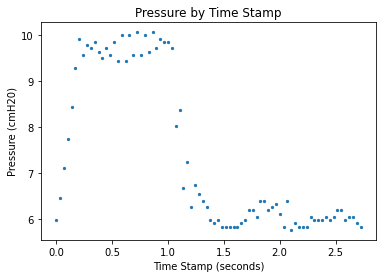

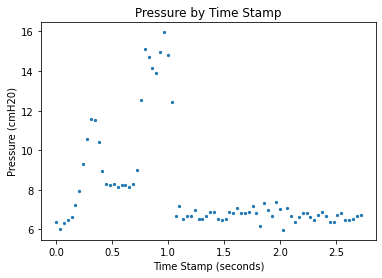

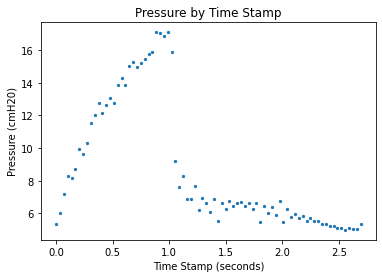

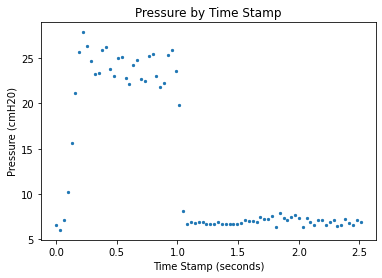

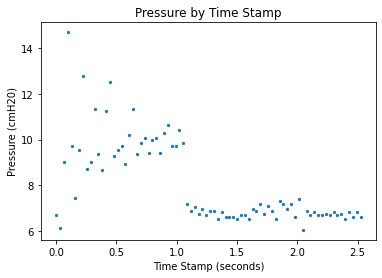

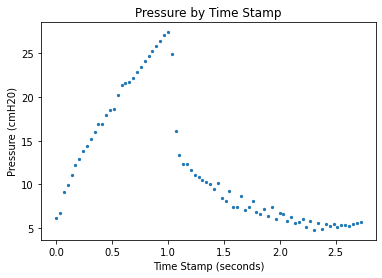

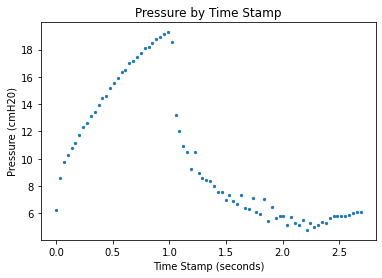

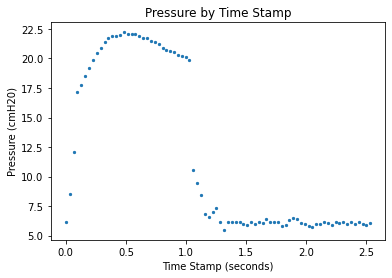

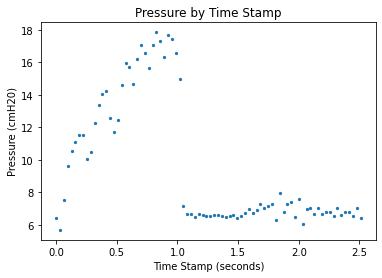

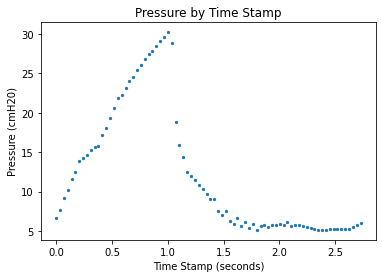

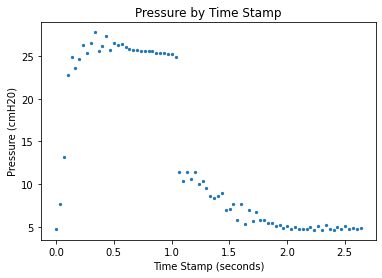

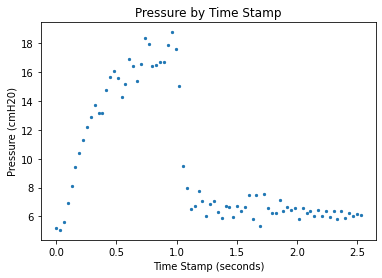

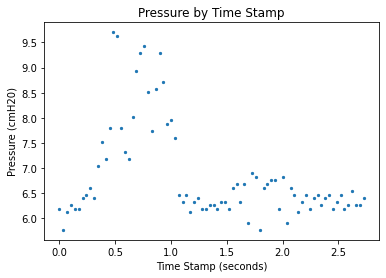

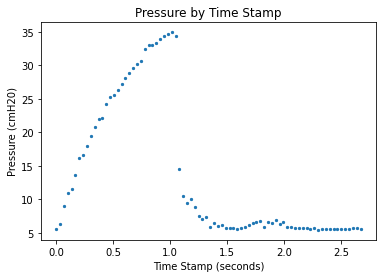

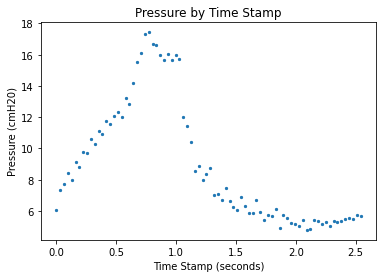

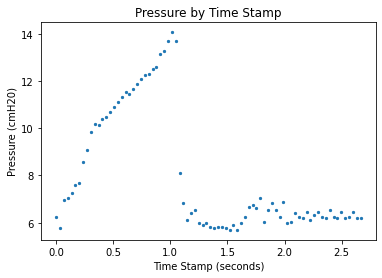

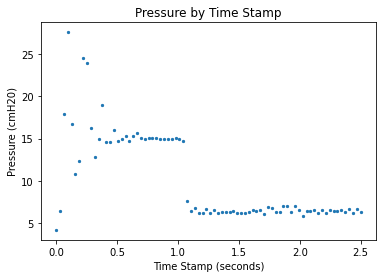

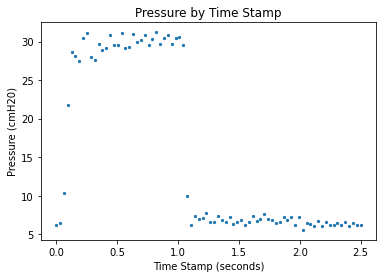

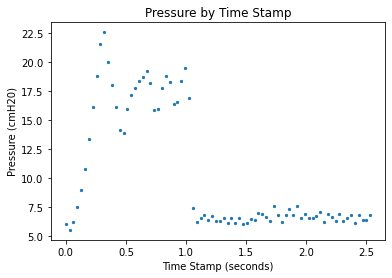

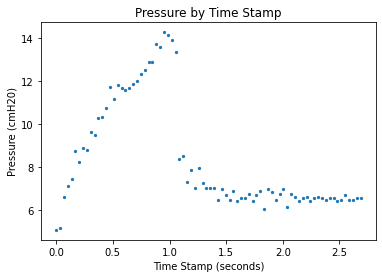

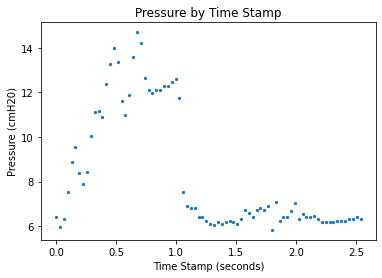

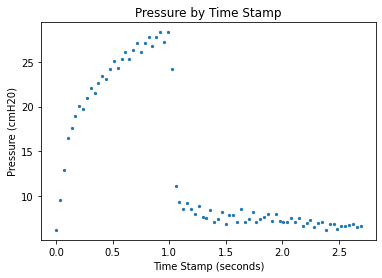

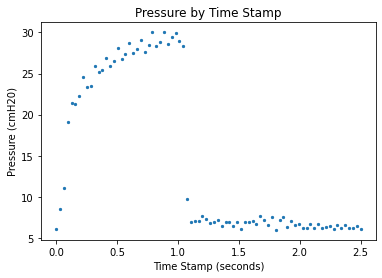

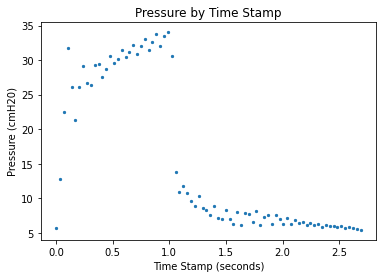

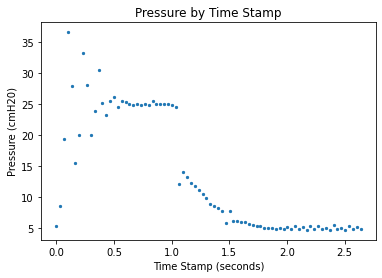

In [27]:
data_df[:points_to_plot].plot.scatter('time_step', 'pressure', s = 5, c=data_df[:points_to_plot]['breath_id'].map(cmap))
for breath in points_by_breath:
    data_df.iloc[breath].plot.scatter('time_step', 'pressure', s = 5)
    plt.xlabel("Time Stamp (seconds)")
    plt.ylabel("Pressure (cmH20)")
    plt.title("Pressure by Time Stamp")

In [28]:
# outlying_data.loc[:,'outlying'] = 1
true_outlying_data.loc[:,'outlying'] = 1
typical_data = data_df[:points_to_plot]
typical_data.loc[:,'outlying'] = 0
merged_data = pd.concat([typical_data, true_outlying_data])
print(merged_data.head())

   id  breath_id   R   C  time_step       u_in  u_out   pressure  outlying
0   1          1  20  50   0.000000   0.083334      0   5.837492         0
1   2          1  20  50   0.033652  18.383041      0   5.907794         0
2   3          1  20  50   0.067514  22.509278      0   7.876254         0
3   4          1  20  50   0.101542  22.808822      0  11.742872         0
4   5          1  20  50   0.135756  25.355850      0  12.234987         0


C:\Users\stone\Miniconda3\envs\BrownDSI\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


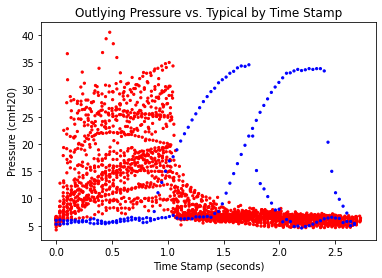

In [29]:
ax = merged_data.plot.scatter('time_step', 'pressure', s = 5, c=merged_data['outlying'].map({0: 'red', 1:'blue'}))

plt.xlabel("Time Stamp (seconds)")
plt.ylabel("Pressure (cmH20)")
plt.title("Outlying Pressure vs. Typical by Time Stamp")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'Outlying vs Typical Pressure over Time scatter.png')

#### u_in: continuous

In [30]:
data_df['u_in'].value_counts()

0.000000      1432253
100.000000      21739
1.277707           76
1.494747           70
0.058727           67
               ...   
1.116695            1
0.665753            1
0.782097            1
0.615699            1
1.482739            1
Name: u_in, Length: 4020300, dtype: int64

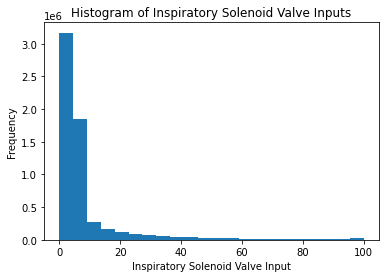

In [31]:
num_rows=  shape[0]
nbins = int(num_rows**0.2)
ax = data_df['u_in'].plot.hist(bins = nbins)
plt.xlabel("Inspiratory Solenoid Valve Input")
plt.ylabel("Frequency")
plt.title("Histogram of Inspiratory Solenoid Valve Inputs")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'u_in distribution.png')

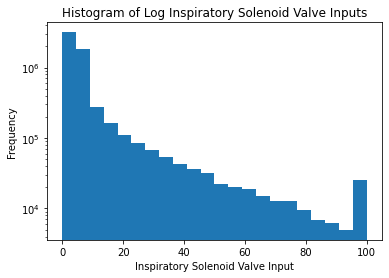

In [32]:
num_rows=  shape[0]
nbins = int(num_rows**0.2)
ax = data_df['u_in'].plot.hist(bins = nbins, logy=True)
plt.xlabel("Inspiratory Solenoid Valve Input")
plt.ylabel("Frequency")
plt.title("Histogram of Log Inspiratory Solenoid Valve Inputs")
plt.show()

fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'log u_in distribution.png')

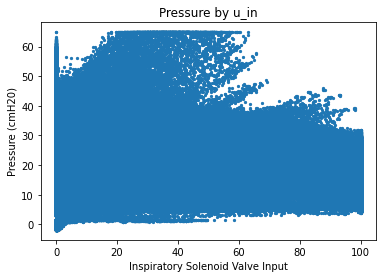

In [33]:
ax = data_df.plot.scatter('u_in', 'pressure', s = 5)
plt.xlabel("Inspiratory Solenoid Valve Input")
plt.ylabel("Pressure (cmH20)")
plt.title("Pressure by u_in")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'Pressure by u_in scatter.png')

##### Testing Outlying Data from Pressure over Time Plots:

2


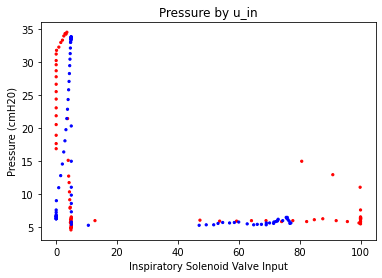

In [34]:
# outlying_data.loc[:,'outlying'] = 1
# typical_data = data_df[:points_to_plot]
# typical_data.loc[:,'outlying'] = 0
# merged_data = pd.concat([typical_data, outlying_data])
# print(merged_data.head())
print(true_outlying_data['breath_id'].nunique())
ax = true_outlying_data.plot.scatter('u_in', 'pressure', s = 5, c=true_outlying_data['breath_id'].map(outlying_cmap))
plt.xlabel("Inspiratory Solenoid Valve Input")
plt.ylabel("Pressure (cmH20)")
plt.title("Pressure by u_in")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'outlying pressure over u_in.png')

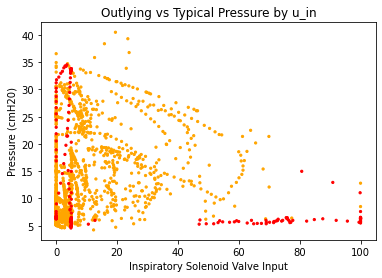

In [35]:
ax = merged_data.plot.scatter('u_in', 'pressure', s = 5, c=merged_data['outlying'].map(colormap))
plt.xlabel("Inspiratory Solenoid Valve Input")
plt.ylabel("Pressure (cmH20)")
plt.title("Outlying vs Typical Pressure by u_in")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'outlying vs typical pressure vs u_in.png')

#### u_out: categorical, binary

In [36]:
u_out_vc = data_df['u_out'].value_counts()
num_cats = len(u_out_vc.keys())
print(u_out_vc)
print("Number of categories: " + str(num_cats))

u_out_barplot_data = {"u_out":u_out_vc.keys(),
        "counts":[u_out_vc[k] for k in u_out_vc.keys()]
        };
u_out_barplot_df = pd.DataFrame(data = u_out_barplot_data)

1    3745032
0    2290968
Name: u_out, dtype: int64
Number of categories: 2


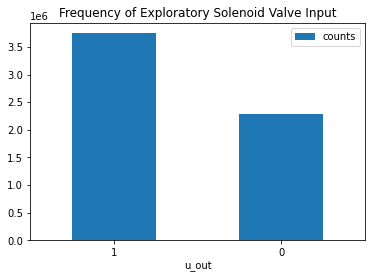

In [37]:
ax = u_out_barplot_df.plot.bar(x="u_out", y="counts", rot=0, title="Frequency of Exploratory Solenoid Valve Input");


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'u_out barplot.png')

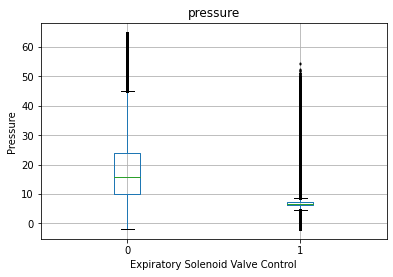

In [16]:
flierprops = dict(markersize=1)
ax = data_df[['u_out', 'pressure']].boxplot(by = 'u_out', flierprops=flierprops)
plt.xlabel("Expiratory Solenoid Valve Control")
plt.ylabel("Pressure")
plt.suptitle("")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'pressure vs. u_out boxplot.png')

#### pressure: continuous

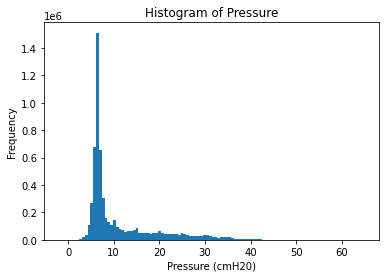

In [39]:
num_rows=  shape[0]
nbins = int(num_rows**0.3)
ax = data_df['pressure'].plot.hist(bins = nbins)
plt.xlabel("Pressure (cmH20)")
plt.ylabel("Frequency")
plt.title("Histogram of Pressure")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'target pressure histogram.png')

### Feature Correlations:

In [40]:
modeled_df = data_df[['R', 'C', 'time_step', 'u_in', 'u_out', 'pressure']]

#### Scatter Matrix:

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

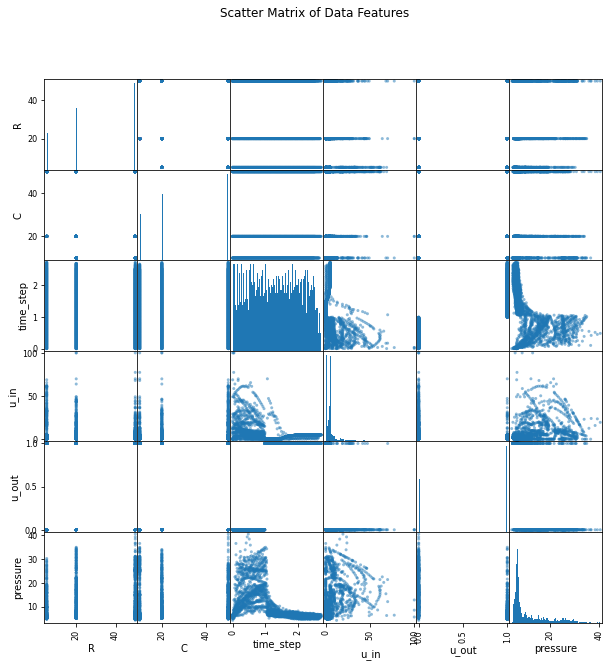

In [41]:
ax = pd.plotting.scatter_matrix(modeled_df[:points_to_plot], hist_kwds={'bins':nbins}, figsize=(10,10))
plt.suptitle("Scatter Matrix of Data Features")


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'scatter matrix of data features.png')

#### Correlations:

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt

In [43]:
corrMatrix = modeled_df.corr()

In [44]:
print (corrMatrix)

                  R         C  time_step      u_in     u_out  pressure
R          1.000000 -0.096070  -0.014535 -0.148120 -0.007594  0.015976
C         -0.096070  1.000000   0.004936  0.151002  0.003720 -0.036727
time_step -0.014535  0.004936   1.000000 -0.352276  0.839191 -0.524829
u_in      -0.148120  0.151002  -0.352276  1.000000 -0.416985  0.308136
u_out     -0.007594  0.003720   0.839191 -0.416985  1.000000 -0.614910
pressure   0.015976 -0.036727  -0.524829  0.308136 -0.614910  1.000000


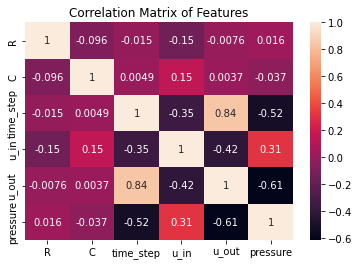

In [46]:
ax = sn.heatmap(corrMatrix, annot=True)
plt.title("Correlation Matrix of Features")
plt.show()


fig = ax.get_figure()
fig.savefig(FIGURE_FOLDER + 'correlation matrix.png')

## Data Preprocessing:

In [581]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### Creating New Breath ID:

In [533]:
X = modeled_df[['R', 'C', 'time_step', 'u_in', 'u_out']]
y = modeled_df[['pressure']]

In [534]:
new_breath_id = [int(np.floor(i / 80) + 1) for i in range(0,shape[0])]
X['new_breath_ID'] = new_breath_id

In [535]:
breaths = X['new_breath_ID']

### Feature Transformations:

In [580]:
categorical_features = ['u_out']
ranked_features = ['R', 'C']
continuous_features = ['time_step', 'u_in']

In [587]:
feats_p = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('rank', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ranked_features),
        ('cont', MinMaxScaler(), continuous_features)
    ]
)

feats_preprocessor = Pipeline(steps = [('preprocessor', feats_p)])

target_transform = MinMaxScaler()

### Splitting Data:

In [ ]:
dd

#### 

In [588]:
from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import ShuffleSplit

In [541]:
print(breaths.unique())
print(breaths.nunique())
print(breaths.max())
print(breaths.head())

[    1     2     3 ... 75448 75449 75450]
75450
75450
0    1
1    1
2    1
3    1
4    1
Name: new_breath_ID, dtype: int64


#### Shuffle Splitting into CV Sets:

In [542]:
cvs = 5
split_portion = 1 / cvs # large dataset
data_len = shape[0]
split_size = int(split_portion * data_len)
# rs = ShuffleSplit(n_splits=cvs, train_size=split_size, test_size=None, random_state=0)

In [544]:
rand_breaths = breaths.unique()
np.random.shuffle(rand_breaths)
breath_splits = np.array_split(rand_breaths, cvs)
print(max(rand_breaths) * 80  - shape[0])

0


In [543]:
np.linspace(0, 1 - split_portion, int(1 / split_portion))

array([0. , 0.2, 0.4, 0.6, 0.8])

#### Time Series Split in Groups:

In [545]:
gap = 1
time_splits = 4
valid_test_size = POINTS_PER_BREATH // (time_splits + 1)
valid_size = int(valid_test_size / 2)
test_size = int(valid_test_size / 2)
single_breath_model = list(range(POINTS_PER_BREATH))
perbreath_tss = TimeSeriesSplit(gap=gap, max_train_size=None, n_splits=time_splits, test_size=valid_test_size)

In [594]:
fold = breath_splits[0] # example
count = 1
for breath_train_idx, breath_other_idx in perbreath_tss.split(single_breath_model):
    breath_valid_idx = breath_other_idx[:valid_size]
    breath_test_idx = breath_other_idx[valid_size:] 
    
    train_idxs = [i + breath*POINTS_PER_BREATH for breath in fold for i in breath_train_idx]
    valid_idxs = [i + breath*POINTS_PER_BREATH for breath in fold for i in breath_valid_idx]
    test_idxs  = [i + breath*POINTS_PER_BREATH for breath in fold for i in breath_test_idx]
    
    
    print("Split ", count)
    print("TRAIN:", train_idxs[:10], "LEN:", len(train_idxs)) 
    print("VALID: ", valid_idxs[:10])
    print("TEST:", test_idxs[:10])
    count += 1
    
    X_train, y_train = X.iloc[train_idxs], y.iloc[train_idxs]
    X_valid, y_valid = X.iloc[valid_idxs], y.iloc[valid_idxs]
    X_test,  y_test  = X.iloc[test_idxs],  y.iloc[test_idxs]
    
    X_train_prep = feats_preprocessor.fit_transform(X_train)
    X_val_prep = feats_preprocessor.transform(X_valid)
#     print(X_test['C'].unique())
#     print(X_train['C'].unique())
#     print(X_test['R'].unique())
#     print(X_train['R'].unique())
#     print(X_test['u_out'].unique())
#     print(X_train['u_out'].unique())
    X_test_prep = feats_preprocessor.transform(X_test)
    
    print(X_train_prep.shape[1])
    
    # 2D array necessary for transform
    y_train = y_train.to_numpy().reshape(-1, 1)
    y_valid = y_valid.to_numpy().reshape(-1, 1)
    y_test = y_test.to_numpy().reshape(-1, 1)
    
    y_train_prep = target_transform.fit_transform(y_train)
    y_valid_prep = target_transform.transform(y_valid)
    y_test_prep = target_transform.transform(y_test)
    
    assert train_idxs[0] == fold[0] * POINTS_PER_BREATH

Split  1
TRAIN: [5483760, 5483761, 5483762, 5483763, 5483764, 5483765, 5483766, 5483767, 5483768, 5483769] LEN: 226350
VALID:  [5483776, 5483777, 5483778, 5483779, 5483780, 5483781, 5483782, 5483783, 701456, 701457]
TEST: [5483784, 5483785, 5483786, 5483787, 5483788, 5483789, 5483790, 5483791, 701464, 701465]
5
Split  2
TRAIN: [5483760, 5483761, 5483762, 5483763, 5483764, 5483765, 5483766, 5483767, 5483768, 5483769] LEN: 467790
VALID:  [5483792, 5483793, 5483794, 5483795, 5483796, 5483797, 5483798, 5483799, 701472, 701473]
TEST: [5483800, 5483801, 5483802, 5483803, 5483804, 5483805, 5483806, 5483807, 701480, 701481]
6
Split  3
TRAIN: [5483760, 5483761, 5483762, 5483763, 5483764, 5483765, 5483766, 5483767, 5483768, 5483769] LEN: 709230
VALID:  [5483808, 5483809, 5483810, 5483811, 5483812, 5483813, 5483814, 5483815, 701488, 701489]
TEST: [5483816, 5483817, 5483818, 5483819, 5483820, 5483821, 5483822, 5483823, 701496, 701497]
6
Split  4
TRAIN: [5483760, 5483761, 5483762, 5483763, 5483764,

In [314]:
dummy_split = TimeSeriesSplit(gap=1, max_train_size=None, n_splits=4, test_size=valid_test_size)

In [315]:
for train_idx, other_idx in dummy_split.split(single_group_model):
    print(train_idx)
    valid_idx = other_idx[:valid_size]
    test_idx = other_idx[valid_size:] 
    print(valid_idx)
    print(test_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[16 17 18 19 20 21 22 23]
[24 25 26 27 28 29 30 31]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[48 49 50 51 52 53 54 55]
[56 57 58 59 60 61 62 63]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
[64 65 66 67 68 69 70 71]
[72 73 74 75 76 77 78 79]


# Notes:


Evaluation metrics after feature engineering:
 - remember to do baseline evaluation metric (continuous output, MSE vs. R^2?)
 - Loss Function for NN? Which one to use (What's common for RNN's?)
 - 
 
Feature importance: 
- global and local feature importance
- for traditional ML models is fine: eg. weights in linear regression
    - if it's hard for NN, just report the feature importance for regular ML models, report that NN's
 - remember to use *multiple* ways to do feature importance
     - eg. SHAP, permutation, logistic/linear coefficients (optional if not best model)
     - Permutation: after have best model, use best model to run specific algo to test data
         - data should be preprocessed after previous (midterm) (Lecture 10 or 11?)